<a href="https://colab.research.google.com/github/saathwik-gif/Sustainable-agriculture-edunet/blob/main/edunet_sustainable_agriculture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Crop_Recommendation.csv to Crop_Recommendation.csv


In [3]:
import pandas as pd

df = pd.read_csv('Crop_Recommendation.csv')
print(df.head())
print(df.info())
print(df.isnull().sum())


   Nitrogen  Phosphorus  Potassium  Temperature   Humidity  pH_Value  \
0        90          42         43    20.879744  82.002744  6.502985   
1        85          58         41    21.770462  80.319644  7.038096   
2        60          55         44    23.004459  82.320763  7.840207   
3        74          35         40    26.491096  80.158363  6.980401   
4        78          42         42    20.130175  81.604873  7.628473   

     Rainfall  Crop  
0  202.935536  Rice  
1  226.655537  Rice  
2  263.964248  Rice  
3  242.864034  Rice  
4  262.717340  Rice  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   f

In [4]:
import pandas as pd

df = pd.read_csv('Crop_Recommendation.csv')

print(df.shape)
print(df.head())


(2200, 8)
   Nitrogen  Phosphorus  Potassium  Temperature   Humidity  pH_Value  \
0        90          42         43    20.879744  82.002744  6.502985   
1        85          58         41    21.770462  80.319644  7.038096   
2        60          55         44    23.004459  82.320763  7.840207   
3        74          35         40    26.491096  80.158363  6.980401   
4        78          42         42    20.130175  81.604873  7.628473   

     Rainfall  Crop  
0  202.935536  Rice  
1  226.655537  Rice  
2  263.964248  Rice  
3  242.864034  Rice  
4  262.717340  Rice  


In [5]:

print(df.isnull().sum())

print(df.dtypes)

print("Duplicates:", df.duplicated().sum())


Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64
Nitrogen         int64
Phosphorus       int64
Potassium        int64
Temperature    float64
Humidity       float64
pH_Value       float64
Rainfall       float64
Crop            object
dtype: object
Duplicates: 0


In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Crop_Encoded'] = le.fit_transform(df['Crop'])

label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:", label_mapping)

Label Mapping: {'Apple': np.int64(0), 'Banana': np.int64(1), 'Blackgram': np.int64(2), 'ChickPea': np.int64(3), 'Coconut': np.int64(4), 'Coffee': np.int64(5), 'Cotton': np.int64(6), 'Grapes': np.int64(7), 'Jute': np.int64(8), 'KidneyBeans': np.int64(9), 'Lentil': np.int64(10), 'Maize': np.int64(11), 'Mango': np.int64(12), 'MothBeans': np.int64(13), 'MungBean': np.int64(14), 'Muskmelon': np.int64(15), 'Orange': np.int64(16), 'Papaya': np.int64(17), 'PigeonPeas': np.int64(18), 'Pomegranate': np.int64(19), 'Rice': np.int64(20), 'Watermelon': np.int64(21)}


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(['Crop', 'Crop_Encoded'], axis=1)
y = df['Crop_Encoded']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (1760, 7)
Test shape: (440, 7)


In [8]:
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
X = df.drop(['Crop', 'Crop_Encoded'], axis=1)
y = df['Crop_Encoded']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Original features shape:", X.shape)
print("Scaled features shape:", X_scaled.shape)
print("Target shape:", y.shape)
print("Class distribution:\n", y.value_counts())

Original features shape: (2200, 7)
Scaled features shape: (2200, 7)
Target shape: (2200,)
Class distribution:
 Crop_Encoded
20    100
11    100
3     100
9     100
18    100
13    100
14    100
2     100
10    100
19    100
1     100
12    100
7     100
21    100
15    100
0     100
16    100
17    100
4     100
6     100
8     100
5     100
Name: count, dtype: int64


In [9]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler


# Load dataset
data = pd.read_csv("Crop_Recommendation.csv")

# Encode the target variable
le = LabelEncoder()
data['Crop_Encoded'] = le.fit_transform(data['Crop'])

# Split features and labels
X = data.drop(['Crop', 'Crop_Encoded'], axis=1)
y = data["Crop_Encoded"]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# Evaluate Random Forest
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("\nRandom Forest Report:\n", classification_report(y_test, rf_pred))

# Evaluate XGBoost
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print("\nXGBoost Report:\n", classification_report(y_test, xgb_pred))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:10:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Random Forest Accuracy: 0.9954545454545455

Random Forest Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.95      1.00      0.98        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       0.95      1.00      0.98        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16  

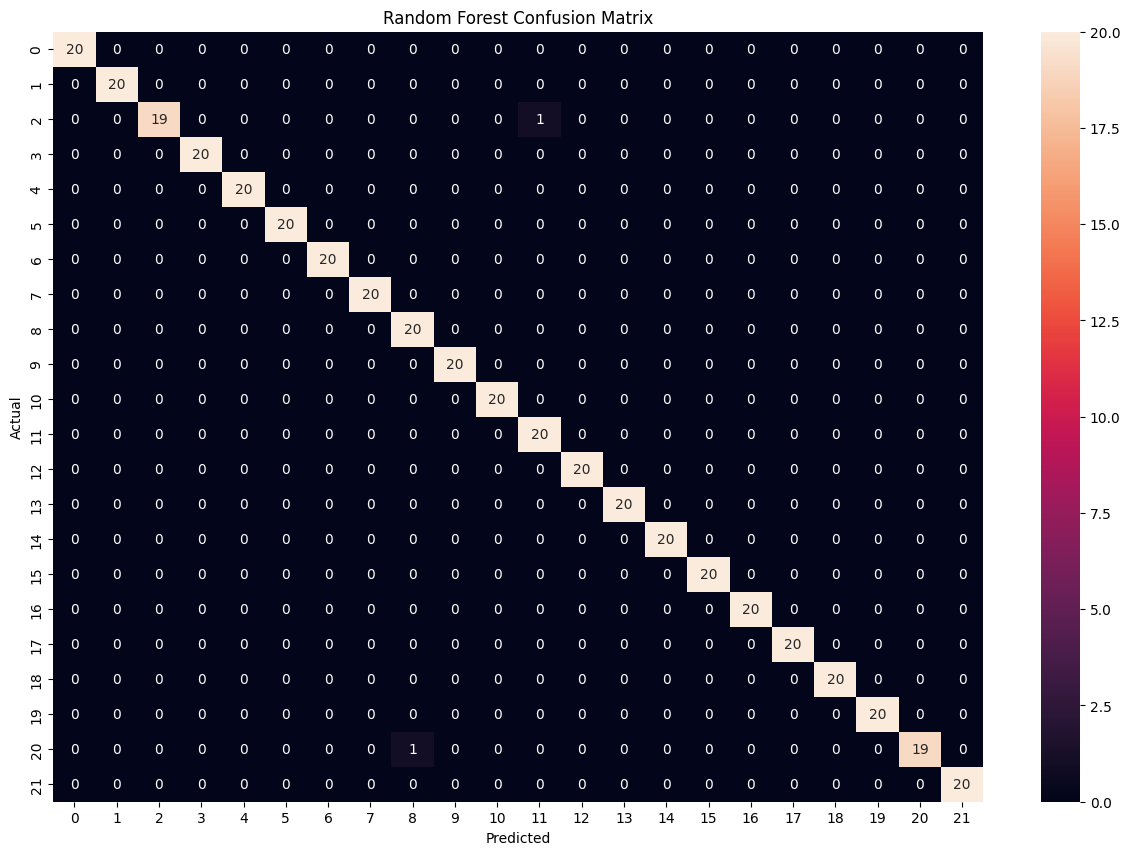

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, rf_pred, labels=rf_model.classes_)
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()


In [12]:
import pickle
pickle.dump(rf_model, open('crop_model.pkl', 'wb'))

In [15]:
import streamlit as st
import pickle
import numpy as np

# load model
model = pickle.load(open('crop_model.pkl','rb'))

st.title("Crop Recommendation App")

# user inputs
N = st.number_input("Nitrogen")
P = st.number_input("Phosphorous")
K = st.number_input("Potassium")
temperature = st.number_input("Temperature")
humidity = st.number_input("Humidity")
ph = st.number_input("pH")
rainfall = st.number_input("Rainfall")

if st.button("Predict Crop"):
    input_data = np.array([[N,P,K,temperature,humidity,ph,rainfall]])
    prediction = model.predict(input_data)
    st.success(f"Recommended Crop: {prediction[0]}")


2025-09-14 16:11:27.897 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-14 16:11:28.187 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-09-14 16:11:28.189 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-14 16:11:28.190 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-14 16:11:28.191 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-14 16:11:28.194 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-14 16:11:28.195 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-14 16:11:28.196 Thread 'MainThread': mi

In [14]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 2.5 MB/s eta 0:00:00


In [17]:
!streamlit run app.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py


In [39]:
%%writefile app.py
import streamlit as st
import pickle
import numpy as np
from sklearn.preprocessing import StandardScaler

# load model and scaler
model = pickle.load(open('crop_model.pkl','rb'))
# Assuming you have a scaler object saved as well, if not, you need to save it
# For now, I'll create a dummy scaler for demonstration, replace this with your actual loaded scaler
scaler = StandardScaler() # Replace with loading your saved scaler

st.title("Crop Recommendation App")

# user inputs
N = st.number_input("Nitrogen")
P = st.number_input("Phosphorous")
K = st.number_input("Potassium")
temperature = st.number_input("Temperature")
humidity = st.number_input("Humidity")
ph = st.number_input("pH")
rainfall = st.number_input("Rainfall")

# Define the label mapping within app.py to ensure consistency
label_mapping = {'Apple': 0, 'Banana': 1, 'Blackgram': 2, 'ChickPea': 3, 'Coconut': 4, 'Coffee': 5, 'Cotton': 6, 'Grapes': 7, 'Jute': 8, 'KidneyBeans': 9, 'Lentil': 10, 'Maize': 11, 'Mango': 12, 'MothBeans': 13, 'MungBean': 14, 'Muskmelon': 15, 'Orange': 16, 'Papaya': 17, 'PigeonPeas': 18, 'Pomegranate': 19, 'Rice': 20, 'Watermelon': 21}
# Create a reverse mapping for prediction output
label_to_crop = {v: k for k, v in label_mapping.items()}


if st.button("Predict Crop"):
    input_data = np.array([[N,P,K,temperature,humidity,ph,rainfall]])
    # Scale the input data
    scaled_input_data = scaler.transform(input_data)
    prediction = model.predict(scaled_input_data)[0]
    recommended_crop = label_to_crop[prediction]
    st.success(f"Recommended Crop: {recommended_crop}")

Overwriting app.py


In [19]:
import streamlit as st
import pickle
import numpy as np

# load model
model = pickle.load(open('crop_model.pkl','rb'))

st.title("Crop Recommendation App")

# user inputs
N = st.number_input("Nitrogen")
P = st.number_input("Phosphorous")
K = st.number_input("Potassium")
temperature = st.number_input("Temperature")
humidity = st.number_input("Humidity")
ph = st.number_input("pH")
rainfall = st.number_input("Rainfall")

if st.button("Predict Crop"):
    input_data = np.array([N,P,K,temperature,humidity,ph,rainfall]).reshape(1,-1)
    prediction = model.predict(input_data)
    st.success(f"Recommended Crop: {prediction[0]}")


2025-09-14 16:14:10.167 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-14 16:14:10.168 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-14 16:14:10.169 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-14 16:14:10.170 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-14 16:14:10.171 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-14 16:14:10.172 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-14 16:14:10.173 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-14 16:14:10.178 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [25]:
!curl https://loca.lt/mytunnelpassword

104.197.131.206

In [29]:
!ngrok config add-authtoken 32hKN3XYoLVmreka5gRmJofhodz_3ntj9zCYopdGwxuqDZQs

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [32]:
from pyngrok import ngrok

ngrok.set_auth_token("32hKN3XyOLVmreka5gRmJofhodr_3ntj9zCYopdGwoxuqDZQs")


In [33]:
!streamlit run app.py &>/dev/null &

public_url = ngrok.connect(8501)
print("Public URL:", public_url)


Public URL: NgrokTunnel: "https://50c458520ac1.ngrok-free.app" -> "http://localhost:8501"


In [46]:
# Example input for a single prediction
input_data = [[90, 42, 43, 20.5, 80, 6.5, 200]]  # list of lists


In [47]:
from sklearn.preprocessing import StandardScaler

# Suppose X_train is your training data
scaler = StandardScaler()
scaler.fit(X_train)   # Fit on training data

# Now transform your input data
scaled_data = scaler.transform(input_data)


In [49]:
import joblib

# Save the fitted scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [50]:
# Example input: [N, P, K, temperature, humidity, ph, rainfall]
input_data = [[90, 42, 43, 20.5, 80, 6.5, 200]]  # List of lists for a single sample


In [51]:
import streamlit as st

N = st.number_input("Nitrogen (N)")
P = st.number_input("Phosphorus (P)")
K = st.number_input("Potassium (K)")
temperature = st.number_input("Temperature")
humidity = st.number_input("Humidity")
ph = st.number_input("pH value")
rainfall = st.number_input("Rainfall")

input_data = [[N, P, K, temperature, humidity, ph, rainfall]]


2025-09-14 16:51:35.951 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-14 16:51:35.952 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-14 16:51:35.953 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-14 16:51:35.954 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-14 16:51:35.955 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-14 16:51:35.956 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-14 16:51:35.957 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-14 16:51:35.959 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [53]:
import joblib

scaler = joblib.load("scaler.pkl")   # scaler fitted on training data
scaled_input_data = scaler.transform(input_data)


In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)  # X_train = your training features
scaled_input_data = scaler.transform(input_data)


In [55]:
model = joblib.load("crop_model.pkl")  # Your trained model
predicted_label = model.predict(scaled_input_data)[0]


In [56]:
label_to_crop = {
    0: "rice",
    1: "maize",
    2: "chickpea",
    # ... all your labels
}

# Make sure to convert np.int64 to int if needed
recommended_crop = label_to_crop.get(int(predicted_label), "Unknown crop")

st.success(f"Recommended Crop: {recommended_crop}")


2025-09-14 16:52:46.336 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-14 16:52:46.337 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-14 16:52:46.338 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [61]:
%%writefile app.py
import streamlit as st
import joblib
import numpy as np

# Load trained model and scaler
model = joblib.load("crop_model.pkl")
scaler = joblib.load("scaler.pkl")

# Input fields
N = st.number_input("Nitrogen (N)")
P = st.number_input("Phosphorus (P)")
K = st.number_input("Potassium (K)")
temperature = st.number_input("Temperature")
humidity = st.number_input("Humidity")
ph = st.number_input("pH value")
rainfall = st.number_input("Rainfall")

# Button to predict
if st.button("Predict Crop"):


Overwriting app.py


In [72]:
if st.button("Predict Crop"):
    # Everything inside this block must be indented
    input_data = [[N, P, K, temperature, humidity, ph, rainfall]]
    scaled_input = scaler.transform(input_data)
    predicted_label = model.predict(scaled_input)[0]

    label_to_crop = {
        0: "rice",
        1: "maize",
        2: "chickpea",
        # Add all labels
    }

    recommended_crop = label_to_crop.get(int(predicted_label), "Unknown crop")
    st.success(f"Recommended Crop: {recommended_crop}")



2025-09-14 17:04:26.609 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-14 17:04:26.614 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-14 17:04:26.615 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-14 17:04:26.616 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-14 17:04:26.617 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-14 17:04:26.618 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [73]:
from pyngrok import ngrok

# List active tunnels
print(ngrok.get_tunnels())

# Disconnect all tunnels
ngrok.kill()


[<NgrokTunnel: "https://ab07582c8649.ngrok-free.app" -> "http://localhost:8501">, <NgrokTunnel: "https://d1b09f957315.ngrok-free.app" -> "http://localhost:8501">]


In [74]:
from pyngrok import ngrok

public_url = ngrok.connect(8501)
print(public_url)

NgrokTunnel: "https://eaddb3b72b67.ngrok-free.app" -> "http://localhost:8501"
